In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import shutil
import os

# Define source and destination directories
source_folder = "/kaggle/input/musheer-sir-data/dataset/Cyclone-20250127T150045Z-001/Cyclone"  # Replace with your source folder path
destination_folder = "/kaggle/working/dataset"  # Replace with your destination folder path

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Destination path for the cyclone folder inside the dataset folder
destination_path = os.path.join(destination_folder, os.path.basename(source_folder))

# Copy the cyclone folder to the dataset folder
try:
    shutil.copytree(source_folder, destination_path, dirs_exist_ok=True)
    print(f"Successfully copied '{source_folder}' to '{destination_path}'.")
except Exception as e:
    print(f"Error: {e}")

Successfully copied '/kaggle/input/musheer-sir-data/dataset/Cyclone-20250127T150045Z-001/Cyclone' to '/kaggle/working/dataset/Cyclone'.


In [2]:
import shutil
import os

# Define source and destination directories
source_folder = "/kaggle/input/musheer-sir-data/dataset/Flood-20250127T150237Z-001/Flood"  # Replace with your source folder path
destination_folder = "/kaggle/working/dataset"  # Replace with your destination folder path

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Destination path for the cyclone folder inside the dataset folder
destination_path = os.path.join(destination_folder, os.path.basename(source_folder))

# Copy the cyclone folder to the dataset folder
try:
    shutil.copytree(source_folder, destination_path, dirs_exist_ok=True)
    print(f"Successfully copied '{source_folder}' to '{destination_path}'.")
except Exception as e:
    print(f"Error: {e}")

Successfully copied '/kaggle/input/musheer-sir-data/dataset/Flood-20250127T150237Z-001/Flood' to '/kaggle/working/dataset/Flood'.


In [3]:
import shutil
import os

# Define source and destination directories
source_folder = "/kaggle/input/musheer-sir-data/dataset/Wildfire-20250127T150352Z-001/Wildfire"  # Replace with your source folder path
destination_folder = "/kaggle/working/dataset"  # Replace with your destination folder path

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Destination path for the cyclone folder inside the dataset folder
destination_path = os.path.join(destination_folder, os.path.basename(source_folder))

# Copy the cyclone folder to the dataset folder
try:
    shutil.copytree(source_folder, destination_path, dirs_exist_ok=True)
    print(f"Successfully copied '{source_folder}' to '{destination_path}'.")
except Exception as e:
    print(f"Error: {e}")

Successfully copied '/kaggle/input/musheer-sir-data/dataset/Wildfire-20250127T150352Z-001/Wildfire' to '/kaggle/working/dataset/Wildfire'.


In [4]:
import shutil
import os

# Define source and destination directories
source_folder = "/kaggle/input/musheer-sir-data/dataset/Earthquake-20250127T150157Z-001/Earthquake"  # Replace with your source folder path
destination_folder = "/kaggle/working/dataset"  # Replace with your destination folder path

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Destination path for the cyclone folder inside the dataset folder
destination_path = os.path.join(destination_folder, os.path.basename(source_folder))

# Copy the cyclone folder to the dataset folder
try:
    shutil.copytree(source_folder, destination_path, dirs_exist_ok=True)
    print(f"Successfully copied '{source_folder}' to '{destination_path}'.")
except Exception as e:
    print(f"Error: {e}")

Successfully copied '/kaggle/input/musheer-sir-data/dataset/Earthquake-20250127T150157Z-001/Earthquake' to '/kaggle/working/dataset/Earthquake'.


In [56]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# Load and preprocess dataset
dataset_dir = "/kaggle/working/dataset"  # Replace with the path to your dataset
img_height, img_width = 224, 224  # ResNet-50 input size
batch_size = 32

In [57]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define ImageDataGenerator for loading images and labels
datagen = ImageDataGenerator(rescale=1.0/255,)

# Load the images from the directory without splitting
data_flow = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False  # Make sure data is not shuffled for consistent splits
)

# Store images (x) and labels (y)
x_data, y_data = [], []

# Load all the data
for i in range(len(data_flow)):
    x_batch, y_batch = data_flow[i]
    x_data.append(x_batch)
    y_data.append(y_batch)


# for i in data_flow:
    # print(i)
    # break;

# Convert to numpy arrays
x_data = np.concatenate(x_data, axis=0)
y_data = np.concatenate(y_data, axis=0)

# Split data into train and test (80-20 split)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


Found 4069 images belonging to 4 classes.
x_train shape: (3255, 224, 224, 3), y_train shape: (3255, 4)
x_test shape: (814, 224, 224, 3), y_test shape: (814, 4)


In [58]:
class_indices = data_flow.class_indices  # Dictionary mapping class names to labels
class_names = {v: k for k, v in class_indices.items()}  # Reverse the dictionary

# Print class names for labels 0, 1, 2, 3
for i in range(4):
    print(f"Class {i}: {class_names[i]}")

Class 0: Cyclone
Class 1: Earthquake
Class 2: Flood
Class 3: Wildfire


# VGG-16

In [14]:
#VGG-16
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, Input, Model

# Define input shape
input_shape = (img_height, img_width, 3)

# Load VGG16 for feature extraction
vgg16_base = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
vgg16_base.trainable = False  # Freeze VGG16 layers

# Input layer
input_layer = Input(shape=input_shape)

# Extract features using VGG16
vgg16_features = vgg16_base(input_layer)
vgg16_features = layers.GlobalAveragePooling2D()(vgg16_features)

# Add fully connected layers for classification
x = layers.Dense(256, activation="relu")(vgg16_features)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(y_train.shape[1], activation="softmax")(x)

# Final model
vgg16_model = Model(inputs=input_layer, outputs=output_layer)

# Summary of the model
vgg16_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,044 (56.64 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [16]:
# Compile the model
vgg16_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Train the model with the callback
epochs = 20
history = vgg16_model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=epochs,
)

Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 67s 490ms/step - accuracy: 0.5370 - loss: 1.0770 - val_accuracy: 0.8391 - val_loss: 0.5241
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - accuracy: 0.8289 - loss: 0.5175 - val_accuracy: 0.8649 - val_loss: 0.4070
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step - accuracy: 0.8452 - loss: 0.4170 - val_accuracy: 0.8882 - val_loss: 0.3560
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - accuracy: 0.8824 - loss: 0.3362 - val_accuracy: 0.8919 - val_loss: 0.3143
Epoch 5/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - accuracy: 0.9039 - loss: 0.3030 - val_accuracy: 0.8919 - val_loss: 0.3071
Epoch 6/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.9041 - loss: 0.2888 - val_accuracy: 0.8980 - val_loss: 0.2892
Epoch 7/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 264ms/step - accuracy: 0.9087 - loss: 0.2831 - val_accuracy: 0.9079 - val_loss: 0.2725
Epoch 8/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 263ms/step - accuracy: 0.9130 - loss: 0

26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 231ms/step


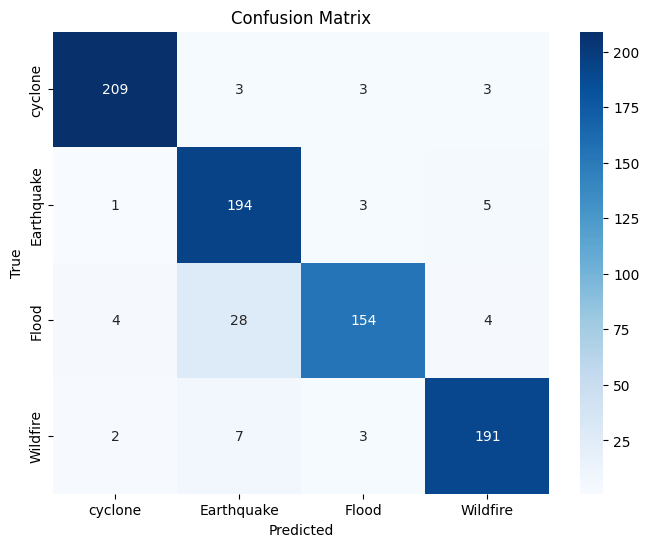

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       218
           1       0.84      0.96      0.89       203
           2       0.94      0.81      0.87       190
           3       0.94      0.94      0.94       203

    accuracy                           0.92       814
   macro avg       0.92      0.92      0.92       814
weighted avg       0.92      0.92      0.92       814

Precision (macro avg): 0.9224
Recall (macro avg): 0.9164
F1 Score (macro avg): 0.9171


In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Predictions
y_pred = vgg16_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Step 2: Get True Labels (y_test is already one-hot encoded, so we use np.argmax to get the class labels)
y_true = np.argmax(y_test, axis=1)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['cyclone','Earthquake','Flood','Wildfire'], yticklabels=['cyclone','Earthquake','Flood','Wildfire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Compute Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_true, y_pred))

# Optionally, you can compute these individually:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"F1 Score (macro avg): {f1:.4f}")

# VGG-19

In [8]:
#VGG-19

from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models, Input, Model

# Define input shape
input_shape = (img_height, img_width, 3)

# Load VGG19 for feature extraction
vgg19_base = VGG19(weights="imagenet", include_top=False, input_shape=input_shape)
vgg19_base.trainable = False  # Freeze VGG19 layers

# Input layer
input_layer = Input(shape=input_shape)

# Extract features using VGG19
vgg19_features = vgg19_base(input_layer)
vgg19_features = layers.GlobalAveragePooling2D()(vgg19_features)

# Add fully connected layers for classification
x = layers.Dense(256, activation="relu")(vgg19_features)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(y_train.shape[1], activation="softmax")(x)

# Final model
vgg19_model = Model(inputs=input_layer, outputs=output_layer)


# Summary of the model
vgg19_model.summary()

I0000 00:00:1749574846.178540      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749574846.179262      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 7, 7, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,156,740 (76.89 MB)

 Trainable params: 132,356 (517.02 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [9]:
# Compile the model
vgg19_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

import time

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    "vgg19_model.keras",  # Filepath to save the model
    monitor="val_accuracy",  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode="max",  # Save the model with the minimum validation loss
    verbose=1
)

# Record the start time
start_time = time.time()

# Train the model with the callback
epochs = 20
history = vgg19_model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=epochs,
    callbacks=[checkpoint]  # Add the checkpoint callback
)

# Record the end time
end_time = time.time()
training_time = end_time - start_time

Epoch 1/20


I0000 00:00:1749574902.727234     116 service.cc:148] XLA service 0x7b433c002f50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749574902.727906     116 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749574902.727926     116 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749574903.193129     116 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/102 ━━━━━━━━━━━━━━━━━━━━ 22:22 13s/step - accuracy: 0.2188 - loss: 1.9097

I0000 00:00:1749574913.890021     116 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.5004 - loss: 1.1683
Epoch 1: val_accuracy improved from -inf to 0.81941, saving model to vgg19_model_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 55s 409ms/step - accuracy: 0.5018 - loss: 1.1659 - val_accuracy: 0.8194 - val_loss: 0.5821
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.8156 - loss: 0.5622
Epoch 2: val_accuracy improved from 0.81941 to 0.84767, saving model to vgg19_model_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 27s 261ms/step - accuracy: 0.8156 - loss: 0.5621 - val_accuracy: 0.8477 - val_loss: 0.4458
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8370 - loss: 0.4593
Epoch 3: val_accuracy improved from 0.84767 to 0.86118, saving model to vgg19_model_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 29s 281ms/step - accuracy: 0.8371 - loss: 0.4592 - val_accuracy: 0.8612 - val_loss: 0.3934
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8662 - loss: 0.3826
Epoch 4: val_a

In [49]:
print("Total Training Time: ",training_time )

Total Training Time:  285.34


In [11]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model("vgg19_model.keras")

# Evaluate on the training and test sets
train_loss, train_accuracy = best_model.evaluate(x_train, y_train)
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 24s 226ms/step - accuracy: 0.9475 - loss: 0.1578
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 244ms/step - accuracy: 0.9250 - loss: 0.2373
Test Loss: 0.2606, Test Accuracy: 0.9128
Train Loss: 0.1667, Train Accuracy: 0.9441


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step


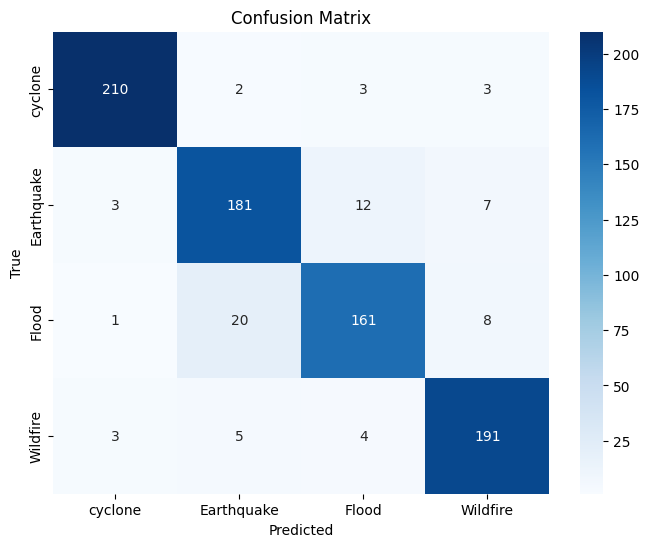

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       218
           1       0.87      0.89      0.88       203
           2       0.89      0.85      0.87       190
           3       0.91      0.94      0.93       203

    accuracy                           0.91       814
   macro avg       0.91      0.91      0.91       814
weighted avg       0.91      0.91      0.91       814

Precision (macro avg): 0.9116
Recall (macro avg): 0.9108
F1 Score (macro avg): 0.9109


In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Predictions
y_pred = best_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Step 2: Get True Labels (y_test is already one-hot encoded, so we use np.argmax to get the class labels)
y_true = np.argmax(y_test, axis=1)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['cyclone','Earthquake','Flood','Wildfire'], yticklabels=['cyclone','Earthquake','Flood','Wildfire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Compute Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_true, y_pred))

# Optionally, you can compute these individually:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"F1 Score (macro avg): {f1:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step


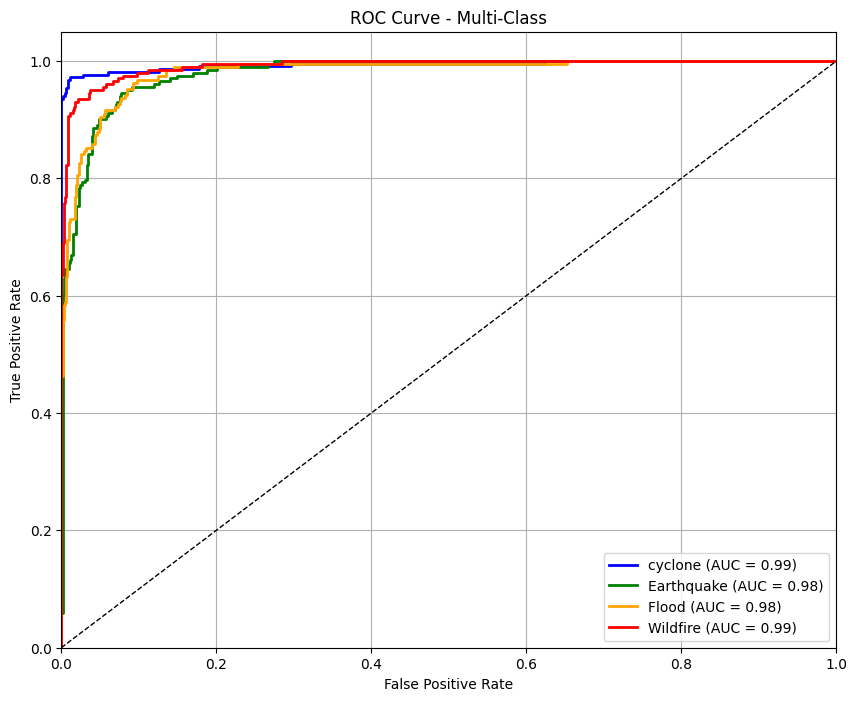

Macro-average ROC AUC: 0.9867


In [13]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming 4 classes: cyclone, Earthquake, Flood, Wildfire
class_names = ['cyclone', 'Earthquake', 'Flood', 'Wildfire']
n_classes = len(class_names)

# Get the predicted probabilities from the model
y_score = best_model.predict(x_test)  # shape: (n_samples, n_classes)

# True labels are already one-hot encoded as y_test
# For ROC, we keep them as is (do not apply argmax)
# If needed, ensure shape compatibility
y_true_bin = y_test  # already one-hot encoded

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Macro-average ROC AUC Score
macro_auc = roc_auc_score(y_true_bin, y_score, average="macro")
print(f"Macro-average ROC AUC: {macro_auc:.4f}")

# ResNet-50

In [14]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, Input, Model

# Define input shape
img_height, img_width = 224, 224  # Set according to dataset
num_classes = y_train.shape[1]     # Number of output classes
input_shape = (img_height, img_width, 3)

# Load ResNet50 for feature extraction
resnet50_base = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
resnet50_base.trainable = False  # Freeze ResNet50 layers

# Input layer
input_layer = Input(shape=input_shape)

# Extract features using ResNet50
resnet50_features = resnet50_base(input_layer)
resnet50_features = layers.GlobalAveragePooling2D()(resnet50_features)  # Flatten feature maps

# Add fully connected layers for classification
x = layers.Dense(256, activation="relu")(resnet50_features)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(num_classes, activation="softmax")(x)  # Match number of classes

# Final model
resnet50_model = Model(inputs=input_layer, outputs=output_layer)

# Summary of the model
resnet50_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,284 (91.98 MB)

 Trainable params: 525,572 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
# Compile the model
resnet50_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint

import time

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    "resnet50_model.keras",  # Filepath to save the model
    monitor="val_accuracy",  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode="max",  # Save the model with the minimum validation loss
    verbose=1
)

# Record the start time
start_time = time.time()

# Train the model with the callback
epochs = 20
history = resnet50_model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=epochs,
    callbacks=[checkpoint]  # Add the checkpoint callback
)

# Record the end time
end_time = time.time()
training_time = end_time - start_time

Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.3612 - loss: 1.3826
Epoch 1: val_accuracy improved from -inf to 0.51106, saving model to resnet50_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - accuracy: 0.3617 - loss: 1.3816 - val_accuracy: 0.5111 - val_loss: 1.1716
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.4906 - loss: 1.1521
Epoch 2: val_accuracy improved from 0.51106 to 0.55897, saving model to resnet50_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - accuracy: 0.4907 - loss: 1.1520 - val_accuracy: 0.5590 - val_loss: 1.0901
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.4974 - loss: 1.1185
Epoch 3: val_accuracy did not improve from 0.55897
102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.4974 - loss: 1.1185 - val_accuracy: 0.5590 - val_loss: 1.0757
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5270 - loss: 1.1081
Epoch 4: val_accuracy improved from 0.55897 to 0.57862, s

In [48]:
print("Total Training Time: ",training_time )

Total Training Time:  263.76


In [17]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model("resnet50_model.keras")

# Evaluate on the training and test sets
train_loss, train_accuracy = best_model.evaluate(x_train, y_train)
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 16s 100ms/step - accuracy: 0.6582 - loss: 0.8424
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.6696 - loss: 0.8703
Test Loss: 0.8999, Test Accuracy: 0.6511
Train Loss: 0.8508, Train Accuracy: 0.6657


26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step


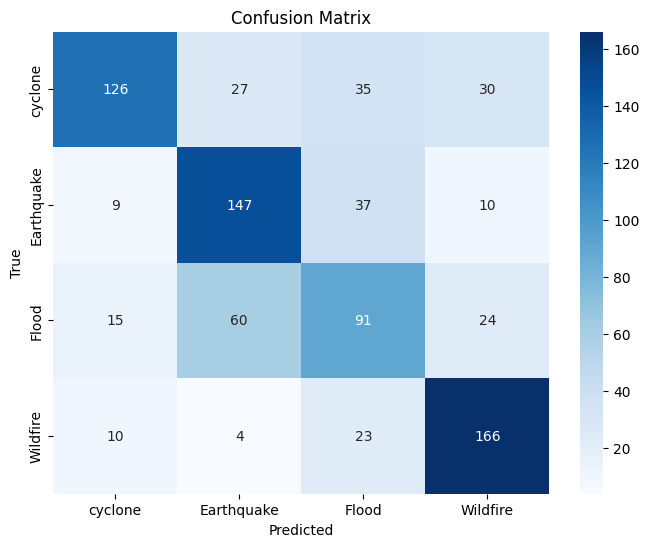

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.58      0.67       218
           1       0.62      0.72      0.67       203
           2       0.49      0.48      0.48       190
           3       0.72      0.82      0.77       203

    accuracy                           0.65       814
   macro avg       0.65      0.65      0.65       814
weighted avg       0.66      0.65      0.65       814

Precision (macro avg): 0.6540
Recall (macro avg): 0.6497
F1 Score (macro avg): 0.6460


In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Predictions
y_pred = best_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Step 2: Get True Labels (y_test is already one-hot encoded, so we use np.argmax to get the class labels)
y_true = np.argmax(y_test, axis=1)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['cyclone','Earthquake','Flood','Wildfire'], yticklabels=['cyclone','Earthquake','Flood','Wildfire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Compute Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_true, y_pred))

# Optionally, you can compute these individually:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"F1 Score (macro avg): {f1:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step


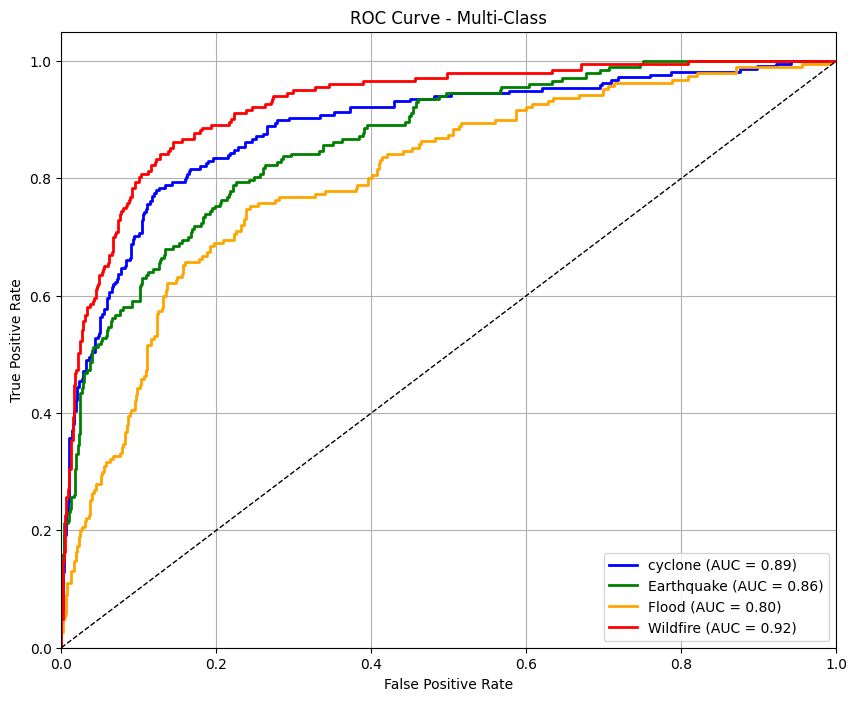

Macro-average ROC AUC: 0.8692


In [19]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming 4 classes: cyclone, Earthquake, Flood, Wildfire
class_names = ['cyclone', 'Earthquake', 'Flood', 'Wildfire']
n_classes = len(class_names)

# Get the predicted probabilities from the model
y_score = best_model.predict(x_test)  # shape: (n_samples, n_classes)

# True labels are already one-hot encoded as y_test
# For ROC, we keep them as is (do not apply argmax)
# If needed, ensure shape compatibility
y_true_bin = y_test  # already one-hot encoded

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Macro-average ROC AUC Score
macro_auc = roc_auc_score(y_true_bin, y_score, average="macro")
print(f"Macro-average ROC AUC: {macro_auc:.4f}")

# Inceptionv3

In [23]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, Input, Model

# Define input shape
input_shape = (img_height, img_width, 3)

# Load InceptionV3 with pre-trained weights
inceptionv3_base = InceptionV3(weights="imagenet", include_top=False, input_shape=input_shape)
inceptionv3_base.trainable = False  # Keep it frozen

# Input layer
input_layer = Input(shape=input_shape)

# Extract features using InceptionV3
inceptionv3_features = inceptionv3_base(input_layer)

# BAD PRACTICE: Use Flatten instead of GAP (less robust)
x = layers.Flatten()(inceptionv3_features)

# Use fewer neurons and poor activation functions
x = layers.Dense(64, activation="tanh")(x)  # Weaker than ReLU in most image tasks
x = layers.Dropout(0.5)(x)  # High dropout rate to kill learning

# Less expressive final Dense layer
output_layer = layers.Dense(y_train.shape[1], activation="softmax")(x)

# Final model
inceptionv3_model = Model(inputs=input_layer, outputs=output_layer)

# Summary
inceptionv3_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 5, 5, 2048)          │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       3,276,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,079,908 (95.67 MB)

 Trainable params: 3,277,124 (12.50 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [24]:
# Compile the model
inceptionv3_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint

import time

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    "inceptionv3.keras",  # Filepath to save the model
    monitor="val_accuracy",  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode="max",  # Save the model with the minimum validation loss
    verbose=1
)

# Record the start time
start_time = time.time()

# Train the model with the callback
epochs = 20
history = inceptionv3_model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=epochs,
    callbacks=[checkpoint]  # Add the checkpoint callback
)

# Record the end time
end_time = time.time()
training_time = end_time - start_time

Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.3936 - loss: 2.4250
Epoch 1: val_accuracy improved from -inf to 0.78747, saving model to inceptionv3.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 40s 240ms/step - accuracy: 0.3942 - loss: 2.4193 - val_accuracy: 0.7875 - val_loss: 0.5561
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5633 - loss: 1.2036
Epoch 2: val_accuracy improved from 0.78747 to 0.84029, saving model to inceptionv3.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 10s 93ms/step - accuracy: 0.5635 - loss: 1.2028 - val_accuracy: 0.8403 - val_loss: 0.4846
Epoch 3/20
101/102 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6157 - loss: 1.0090
Epoch 3: val_accuracy improved from 0.84029 to 0.85258, saving model to inceptionv3.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.6157 - loss: 1.0084 - val_accuracy: 0.8526 - val_loss: 0.4595
Epoch 4/20
101/102 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6668 - loss: 0.7840
Epoch 4: val_accuracy impro

In [50]:
print("Total Training Time: ",training_time )

Total Training Time:  280.61


In [26]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model("inceptionv3.keras")

# Evaluate on the training and test sets
train_loss, train_accuracy = best_model.evaluate(x_train, y_train)
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.9262 - loss: 0.3675
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.9216 - loss: 0.3809
Test Loss: 0.3774, Test Accuracy: 0.9214
Train Loss: 0.3669, Train Accuracy: 0.9241


26/26 ━━━━━━━━━━━━━━━━━━━━ 15s 314ms/step


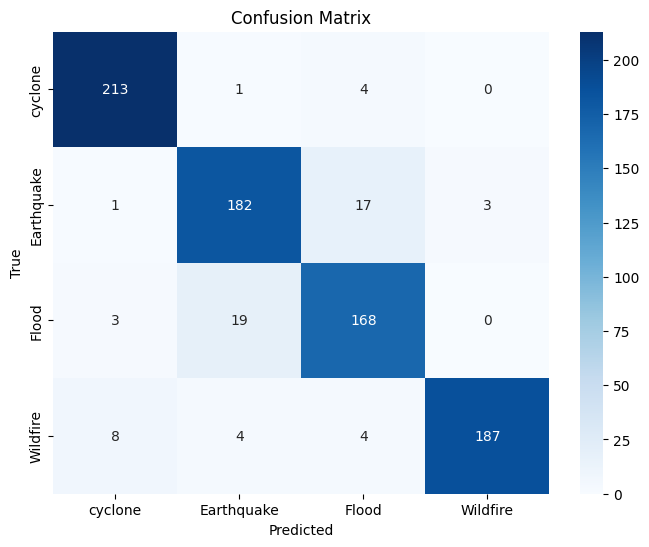

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       218
           1       0.88      0.90      0.89       203
           2       0.87      0.88      0.88       190
           3       0.98      0.92      0.95       203

    accuracy                           0.92       814
   macro avg       0.92      0.92      0.92       814
weighted avg       0.92      0.92      0.92       814

Precision (macro avg): 0.9212
Recall (macro avg): 0.9198
F1 Score (macro avg): 0.9201


In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Predictions
y_pred = best_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Step 2: Get True Labels (y_test is already one-hot encoded, so we use np.argmax to get the class labels)
y_true = np.argmax(y_test, axis=1)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['cyclone','Earthquake','Flood','Wildfire'], yticklabels=['cyclone','Earthquake','Flood','Wildfire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Compute Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_true, y_pred))

# Optionally, you can compute these individually:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"F1 Score (macro avg): {f1:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


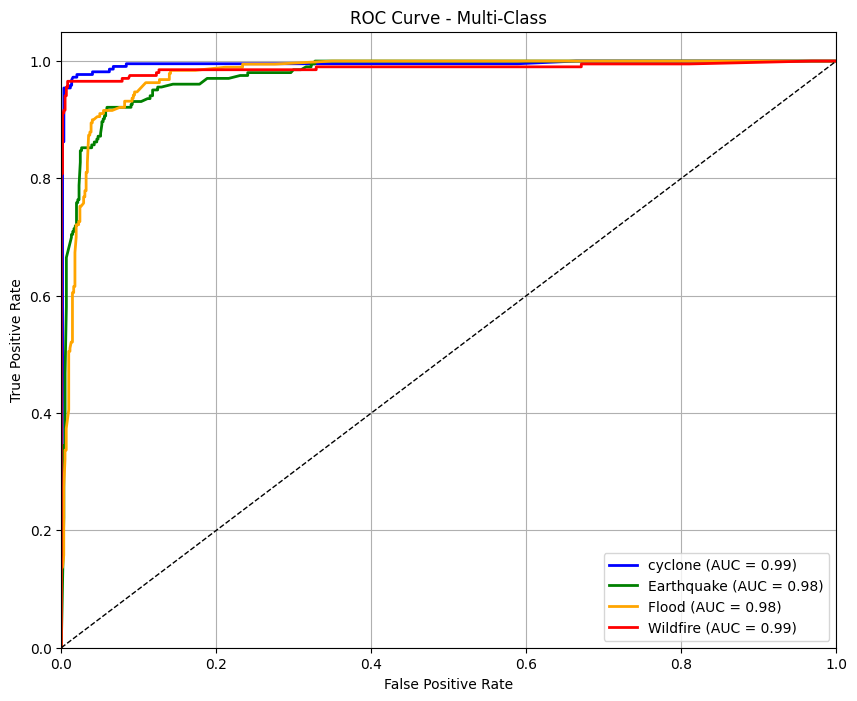

Macro-average ROC AUC: 0.9837


In [28]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming 4 classes: cyclone, Earthquake, Flood, Wildfire
class_names = ['cyclone', 'Earthquake', 'Flood', 'Wildfire']
n_classes = len(class_names)

# Get the predicted probabilities from the model
y_score = best_model.predict(x_test)  # shape: (n_samples, n_classes)

# True labels are already one-hot encoded as y_test
# For ROC, we keep them as is (do not apply argmax)
# If needed, ensure shape compatibility
y_true_bin = y_test  # already one-hot encoded

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Macro-average ROC AUC Score
macro_auc = roc_auc_score(y_true_bin, y_score, average="macro")
print(f"Macro-average ROC AUC: {macro_auc:.4f}")

# DenseNet-169

In [37]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras import layers, models, Input, Model

# Define input shape
input_shape = (img_height, img_width, 3)

# Load DenseNet169
densenet169_base = DenseNet169(weights="imagenet", include_top=False, input_shape=input_shape)
densenet169_base.trainable = False  # Keep frozen to prevent learning

# Input layer
input_layer = Input(shape=input_shape)

# BAD DESIGN: Avoid pooling and flatten full features (very large input to FC)
densenet169_features = densenet169_base(input_layer)
x = layers.Flatten()(densenet169_features)

# BAD DESIGN: Very small Dense layer with poor activation
x = layers.Dense(32, activation="sigmoid")(x)

# Overly aggressive Dropout
x = layers.Dropout(0.5)(x)

# Output layer with too few neurons or underfitted weight init (optional)
output_layer = layers.Dense(y_train.shape[1], activation="softmax")(x)

# Final model
densenet169_model = Model(inputs=input_layer, outputs=output_layer)

# Model summary
densenet169_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet169 (Functional)             │ (None, 7, 7, 1664)          │      12,642,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 81536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │       2,609,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,252,196 (58.18 MB)

 Trainable params: 2,609,316 (9.95 MB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [39]:
# Compile the model
densenet169_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint

import time

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    "densenet169.keras",  # Filepath to save the model
    monitor="val_accuracy",  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode="max",  # Save the model with the minimum validation loss
    verbose=1
)

# Record the start time
start_time = time.time()

# Train the model with the callback
epochs = 20
history = densenet169_model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=epochs,
    callbacks=[checkpoint]  # Add the checkpoint callback
)

# Record the end time
end_time = time.time()
training_time = end_time - start_time

Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.2575 - loss: 1.8661
Epoch 1: val_accuracy improved from -inf to 0.25061, saving model to densenet169.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 86s 485ms/step - accuracy: 0.2577 - loss: 1.8649 - val_accuracy: 0.2506 - val_loss: 1.3428
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.2569 - loss: 1.5894
Epoch 2: val_accuracy improved from 0.25061 to 0.30221, saving model to densenet169.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 134ms/step - accuracy: 0.2569 - loss: 1.5890 - val_accuracy: 0.3022 - val_loss: 1.3794
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2667 - loss: 1.4619
Epoch 3: val_accuracy improved from 0.30221 to 0.41646, saving model to densenet169.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - accuracy: 0.2667 - loss: 1.4617 - val_accuracy: 0.4165 - val_loss: 1.3065
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.2870 - loss: 1.3974
Epoch 4: val_accuracy im

In [51]:
print("Total Training Time: ",training_time )

Total Training Time:  347.85


In [41]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model("densenet169.keras")

# Evaluate on the training and test sets
train_loss, train_accuracy = best_model.evaluate(x_train, y_train)
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 39s 181ms/step - accuracy: 0.7122 - loss: 1.2046
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.7123 - loss: 1.2023
Test Loss: 1.1952, Test Accuracy: 0.7297
Train Loss: 1.2010, Train Accuracy: 0.7257


26/26 ━━━━━━━━━━━━━━━━━━━━ 35s 746ms/step


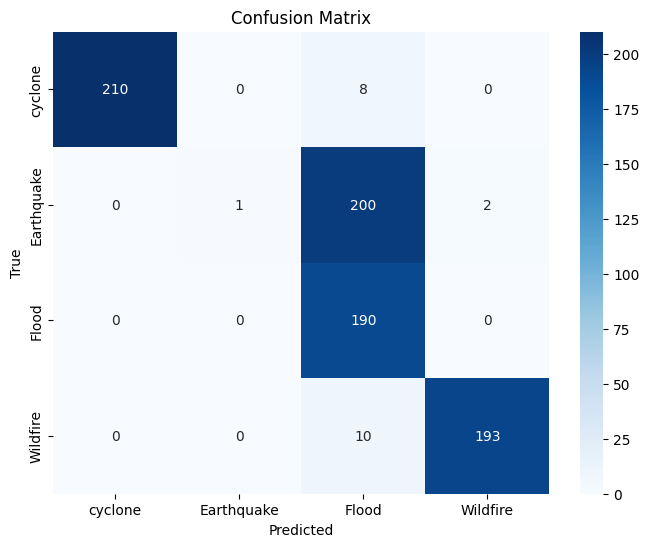

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       218
           1       1.00      0.00      0.01       203
           2       0.47      1.00      0.64       190
           3       0.99      0.95      0.97       203

    accuracy                           0.73       814
   macro avg       0.86      0.73      0.65       814
weighted avg       0.87      0.73      0.66       814

Precision (macro avg): 0.8639
Recall (macro avg): 0.7297
F1 Score (macro avg): 0.6491


In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Predictions
y_pred = best_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Step 2: Get True Labels (y_test is already one-hot encoded, so we use np.argmax to get the class labels)
y_true = np.argmax(y_test, axis=1)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['cyclone','Earthquake','Flood','Wildfire'], yticklabels=['cyclone','Earthquake','Flood','Wildfire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Compute Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_true, y_pred))

# Optionally, you can compute these individually:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"F1 Score (macro avg): {f1:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


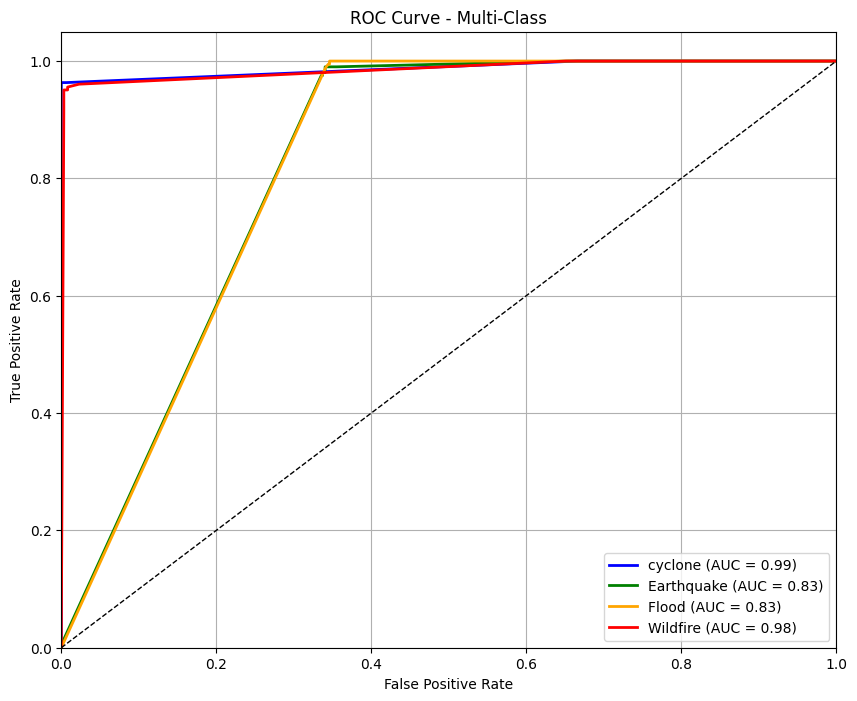

Macro-average ROC AUC: 0.9068


In [43]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming 4 classes: cyclone, Earthquake, Flood, Wildfire
class_names = ['cyclone', 'Earthquake', 'Flood', 'Wildfire']
n_classes = len(class_names)

# Get the predicted probabilities from the model
y_score = best_model.predict(x_test)  # shape: (n_samples, n_classes)

# True labels are already one-hot encoded as y_test
# For ROC, we keep them as is (do not apply argmax)
# If needed, ensure shape compatibility
y_true_bin = y_test  # already one-hot encoded

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'orange', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Macro-average ROC AUC Score
macro_auc = roc_auc_score(y_true_bin, y_score, average="macro")
print(f"Macro-average ROC AUC: {macro_auc:.4f}")

# Proposed Model

In [59]:
#Proposed Model (MobileNet+ CNN)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, Input, Model

# Define input shape
input_shape = (img_height, img_width, 3)

# Simple CNN (Model 1)
def create_simple_cnn(input_shape):
    cnn_input = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation="relu")(cnn_input)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation="relu")(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation="relu")(x)
    # x = layers.GlobalAveragePooling2D()(x)
    x = layers.Conv2D(128, (3, 3), activation="relu")(x)
    x = layers.GlobalAveragePooling2D()(x)
    return Model(inputs=cnn_input, outputs=x, name="SimpleCNN")

simple_cnn = create_simple_cnn(input_shape)

# MobileNetV2 (Model 2) for feature extraction
mobilenetv2_base = MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shape)
mobilenetv2_base.trainable = False  # Freeze MobileNetV2 layers

# Input layer
input_layer = Input(shape=input_shape)

# Extract features from Simple CNN
simple_cnn_features = simple_cnn(input_layer)

# Extract features from MobileNetV2
mobilenetv2_features = mobilenetv2_base(input_layer)
mobilenetv2_features = layers.GlobalAveragePooling2D()(mobilenetv2_features)

# Concatenate features
concatenated_features = layers.concatenate([simple_cnn_features, mobilenetv2_features])


x = layers.Dense(512, activation="relu")(concatenated_features)
# x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(y_train.shape[1], activation="softmax")(x)

# Final model
combined_model = Model(inputs=input_layer, outputs=output_layer)

# Summary of the model
combined_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ mobilenetv2_1.00_224      │ (None, 7, 7, 1280)     │      2,257,984 │ input_layer_19[0][0]   │
│ (Functional)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ SimpleCNN (Functional)    │ (None, 128)            │        240,832 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 1280)           │              0 │ mobilenetv2_1.00_224[… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_5             │ (None, 1408)           │              0 │ SimpleCNN[0][0],       │
│ (Concatenate)             │                        │                │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_16 (Dense)          │ (None, 512)            │        721,408 │ concatenate_5[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_17 (Dense)          │ (None, 4)              │          2,052 │ dense_16[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,222,276 (12.29 MB)

 Trainable params: 964,292 (3.68 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

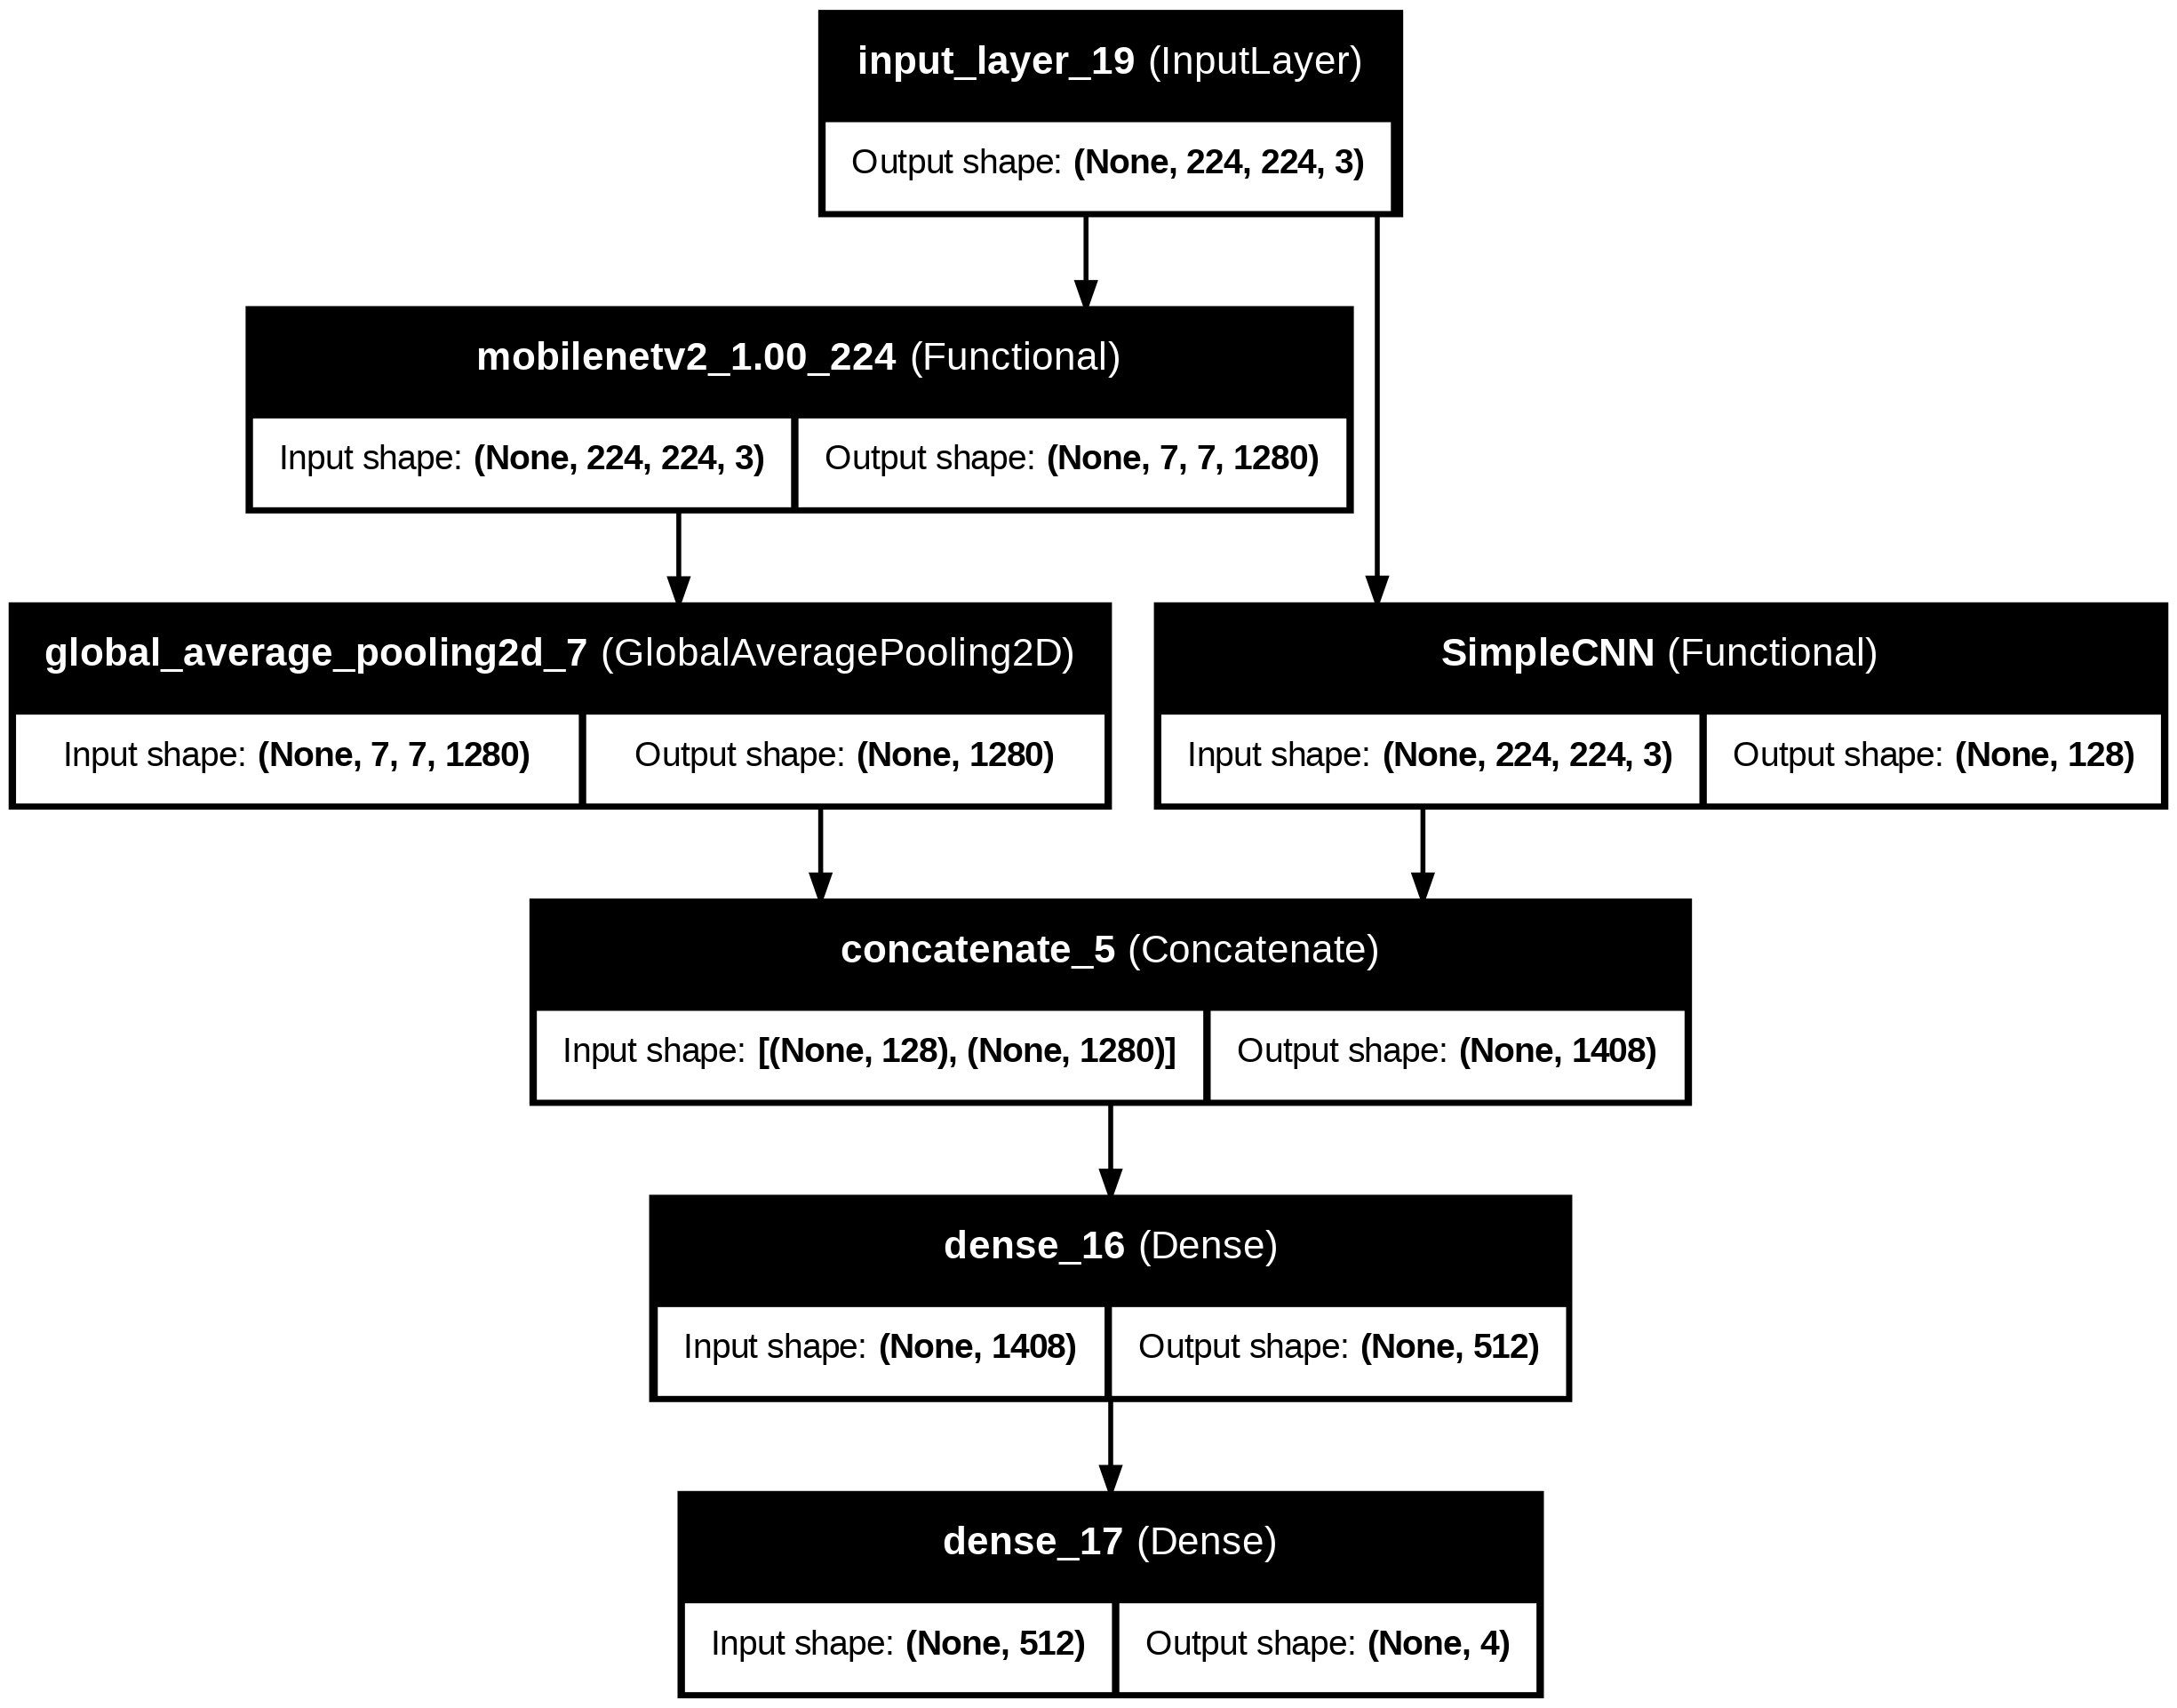

In [60]:
from tensorflow.keras.utils import plot_model

# Plot the model architecture
plot_model(combined_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [61]:
import os

file_path = "best_combined_model.keras"  # Replace with your file name

# Check if file exists before deleting
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"Deleted: {file_path}")
else:
    print(f"File not found: {file_path}")


Deleted: best_combined_model.keras


In [62]:
# Compile the model
combined_model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [69]:
from tensorflow.keras.callbacks import ModelCheckpoint

import time

# Define the checkpoint callback
checkpoint = ModelCheckpoint(
    "best_combined_model.keras",  # Filepath to save the model
    monitor="val_accuracy",  # Monitor validation loss
    save_best_only=True,  # Save only the best model
    mode="max",  # Save the model with the minimum validation loss
    verbose=1
)

# Record the start time
start_time = time.time()

# Train the model with the callback
epochs = 20
history = combined_model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=epochs,
    callbacks=[checkpoint]  # Add the checkpoint callback
)

# Record the end time
end_time = time.time()
training_time = end_time - start_time

Epoch 1/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9620 - loss: 0.4
Epoch 1: saving model to best_combined_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9620 - loss: 0.4 - val_accuracy: 0.9420 - val_loss: 0.1715
Epoch 2/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9640 - loss: 0.2
Epoch 2: saving model to best_combined_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9640 - loss: 0.2 - val_accuracy: 0.9430 - val_loss: 0.173
Epoch 3/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9660 - loss: 0.1333
Epoch 3: val_accuracy did not improve
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9660 - loss: 0.1333 - val_accuracy: 0.9440 - val_loss: 0.1745
Epoch 4/20
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9680 - loss: 0.1
Epoch 4: saving model to best_combined_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9680 - loss: 0.1 - val_accuracy: 0.9450 - val_loss: 0.176
Epoch 5/2

In [64]:
print("Total Training Time: ",training_time )

Total Training Time:  213.86652827262878


In [70]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model("best_combined_model.keras")

# Evaluate on the training and test sets
train_loss, train_accuracy = best_model.evaluate(x_train, y_train)
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)

# Print results
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.9960 - loss: 0.0023
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.9607 - loss: 0.1542
Train Loss: 0.0023, Train Accuracy: 0.9960
Test Loss: 0.1542, Test Accuracy: 0.9607


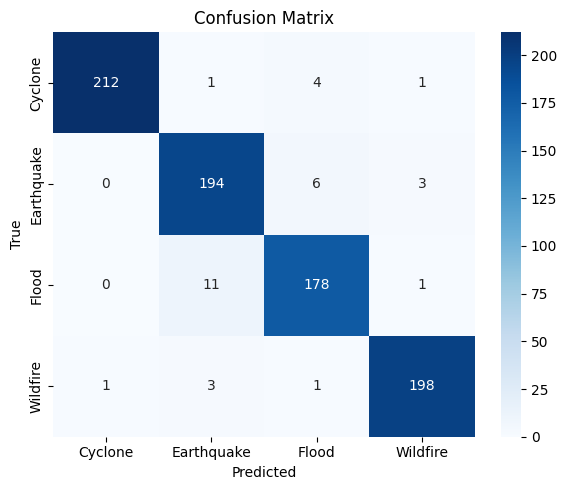


Performance metrics for each class

         Class  Precision (%)  Recall (%)  F1-Score (%)
       Cyclone          99.00       97.00          98.0
    Earthquake          93.00       96.00          94.0
         Flood          94.00       94.00          94.0
     Wild-Fire          98.00       98.00          98.0
Proposed Model          96.02       96.01          96.0

Precision (macro avg): 0.9602
Recall (macro avg): 0.9601
F1 Score (macro avg): 0.9600


In [72]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Predictions
y_pred = best_model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Step 2: Get True Labels (y_test is already one-hot encoded, so we use np.argmax to get the class labels)
y_true = np.argmax(y_test, axis=1)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['cyclone','Earthquake','Flood','Wildfire'], yticklabels=['cyclone','Earthquake','Flood','Wildfire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 4: Compute Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_true, y_pred))

# Optionally, you can compute these individually:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f"Precision (macro avg): {precision:.4f}")
print(f"Recall (macro avg): {recall:.4f}")
print(f"F1 Score (macro avg): {f1:.4f}")

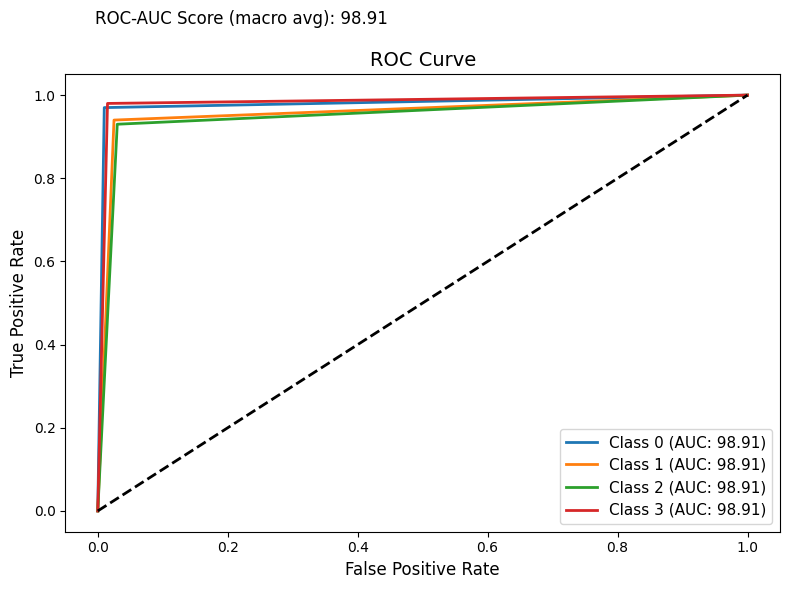

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Compute ROC-AUC Score
num_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))
y_pred_bin = label_binarize(y_pred, classes=np.arange(num_classes))

roc_auc = roc_auc_score(y_true_bin, y_pred_bin, average='macro', multi_class='ovr')
print(f"ROC-AUC Score (macro avg): {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC: {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()